In [4]:
%%time
import ijson
import pandas as pd
from pathlib import Path

#file year 
year = 2025
file_path = f"new_amplitude_export_{year}.json"

#non-empty columns
columns_keep = [
    "$insert_id",
    "amplitude_id",
    "app",
    "city",
    "client_event_time",
    "client_upload_time",
    "country",
    "data",
    "data_type",
    "device_family",
    "device_id",
    "device_type",
    "dma",
    "event_id",
    "event_properties",
    "event_time",
    "event_type",
    "language",
    "library",
    "os_name",
    "os_version",
    "platform",
    "processed_time",
    "region",
    "server_received_time",
    "server_upload_time",
    "session_id",
    "user_id",
    "user_properties",
    "uuid",
]
path = Path(f"{year}_csv")
if not path.exists():
    path.mkdir(parents=True, exist_ok=True)
#use ijson to read the json files efficiently in memory
with open(file_path, "r") as f:
    objects = ijson.items(f, "item") #creates a generator object
    
    batch_size = 100000 #can be updated, currently saves per batches of 100,000
    chunk = []
    count = 0 #used to index batch file
    for obj in objects:
        chunk.append(obj)
        if len(chunk) >= batch_size:
            df = pd.DataFrame(chunk)
            output_csv = f"{year}_csv/{file_path.split('.')[0]}_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
            df = df[columns_keep] #remove empty columns
            df.to_csv(output_csv, index=False)
            count += 1
            chunk = []

    if chunk: #process remaining data if any
        output_csv = f"{year}_csv/{file_path.split('.')[0]}_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
        df = pd.DataFrame(chunk)
        df = df[columns_keep]
        df.to_csv(output_csv, index=False)


CPU times: user 2min 1s, sys: 38.4 s, total: 2min 40s
Wall time: 3min 13s


In [5]:
%%time
import ijson
import pandas as pd
from pathlib import Path

#file chunk 
part = 1
file_path = f"new_export/amplitude_export_chunk_{part}_anonymized.json"

#non-empty columns
columns_keep = [
    "$insert_id",
    "amplitude_id",
    "app",
    "city",
    "client_event_time",
    "client_upload_time",
    "country",
    "data",
    "data_type",
    "device_family",
    "device_id",
    "device_type",
    "dma",
    "event_id",
    "event_properties",
    "event_time",
    "event_type",
    "language",
    "library",
    "os_name",
    "os_version",
    "platform",
    "processed_time",
    "region",
    "server_received_time",
    "server_upload_time",
    "session_id",
    "user_id",
    "user_properties",
    "uuid",
]

path = Path(f"{part}_csv")
if not path.exists():
    path.mkdir(parents=True, exist_ok=True)

#use ijson to read the json files efficiently in memory
with open(file_path, "r") as f:
    objects = ijson.items(f, "item") #creates a generator object
    
    batch_size = 100000 #can be updated, currently saves per batches of 100,000
    chunk = []
    count = 0 #used to index batch file
    for obj in objects:
        chunk.append(obj)
        if len(chunk) >= batch_size:
            df = pd.DataFrame(chunk)
            output_csv = f"{part}_csv/{file_path.split('/')[1].split('.')[0]}_subchunk_{count*batch_size}_{(count+1)*batch_size}.csv"
            df = df[columns_keep] #remove empty columns
            df.to_csv(output_csv, index=False)
            count += 1
            chunk = []

    if chunk: #process remaining data if any
        output_csv = f"{part}_csv/{file_path.split('/')[1].split('.')[0]}_subchunk_{count*batch_size}_{(count+1)*batch_size}.csv"
        df = pd.DataFrame(chunk)
        print(df.shape)
        df = df[columns_keep]
        print(df.shape)
        df.to_csv(output_csv, index=False)


(83027, 54)
(83027, 30)
CPU times: user 54 s, sys: 16.6 s, total: 1min 10s
Wall time: 1min 19s


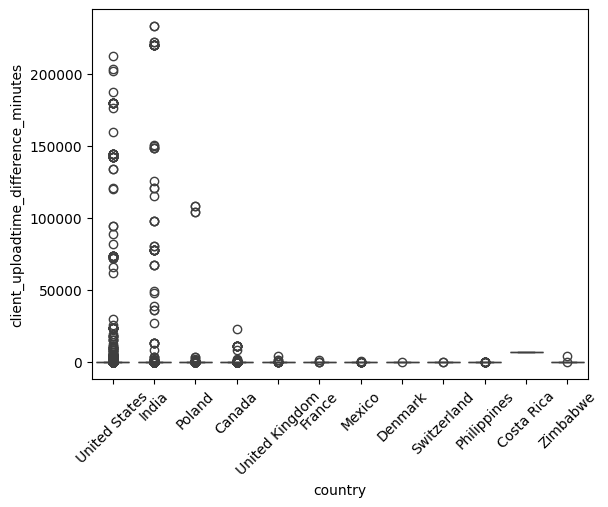

In [29]:
import pandas as pd
import numpy as new_export
import matplotlib.pyplot as plt
import seaborn as sns
# if getting error message, make sure to install matplotlib using pip install
PATH = '1_csv/amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv'
df = pd.read_csv(PATH)
# See the first couple rows of dataset
df.head()

# Generates a summary of statistics for the columns in the dataste
df.describe(include='all')

df['client_event_time'] = pd.to_datetime(df['client_event_time'])
df['client_upload_time'] = pd.to_datetime(df['client_upload_time'])


# Add new columns for 'event_date' and 'event_time'
#df['client_event_timestamp'] = df['client_event_time'].dt.time   # Extracts the time part
#df['client_upload_timestamp'] = df['client_upload_time'].dt.time   # Extracts the time part

df['time_difference'] = df['client_upload_time'] - df['client_event_time']
df['time_difference_minutes'] = df['time_difference'].dt.total_seconds() / 60

df['client_uploadtime_difference_minutes'] = df['time_difference'].dt.total_seconds() / 60

# Summary of statistics on the upload time from client
df['time_difference'].describe()

df.loc[df['time_difference'].idxmax()]

# number of rows where time_difference > 60 days
#num_rows_above_one_day = (df['time_difference_minutes'] > 60).sum()
#print(num_rows_above_one_day)

import pandas as pd
import numpy as new_export
import matplotlib.pyplot as plt
import seaborn as sns
# if getting error message, make sure to install matplotlib using pip install
PATH = '1_csv/amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv'
df = pd.read_csv(PATH)
# See the first couple rows of dataset
df.head()

# Generates a summary of statistics for the columns in the dataste
df.describe(include='all')

df['client_event_time'] = pd.to_datetime(df['client_event_time'])
df['client_upload_time'] = pd.to_datetime(df['client_upload_time'])


# Add new columns for 'event_date' and 'event_time'
#df['client_event_timestamp'] = df['client_event_time'].dt.time   # Extracts the time part
#df['client_upload_timestamp'] = df['client_upload_time'].dt.time   # Extracts the time part

df['time_difference'] = df['client_upload_time'] - df['client_event_time']
df['time_difference_minutes'] = df['time_difference'].dt.total_seconds() / 60

df['client_uploadtime_difference_minutes'] = df['time_difference'].dt.total_seconds() / 60

# Summary of statistics on the upload time from client
df['time_difference'].describe()

df.loc[df['time_difference'].idxmax()]

# number of rows where time_difference > 60 days
#num_rows_above_one_day = (df['time_difference_minutes'] > 60).sum()
#print(num_rows_above_one_day)

#pd.crosstab(df['country'], df['device_type'])
df.groupby('device_type')['client_uploadtime_difference_minutes'].mean()

sns.boxplot(x='country', y='client_uploadtime_difference_minutes', data=df)
plt.xticks(rotation=45)
plt.show()



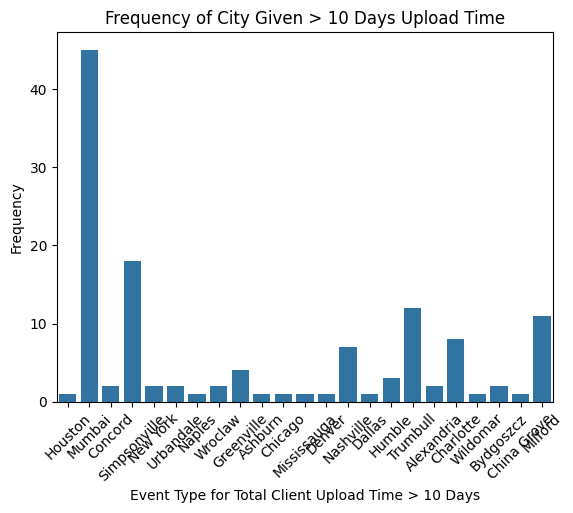

3

In [38]:
# Exploring those with upload times greater than _ days (input in minutes)
filtered_df = df[df['time_difference_minutes'] > 14400]
filtered_df.describe(include='all')

sns.countplot(x='city', data=filtered_df)
plt.xlabel('Event Type for Total Client Upload Time > 10 Days')
plt.ylabel('Frequency')
plt.title('Frequency of City Given > 10 Days Upload Time')

# Rotate x-axis labels if they are crowded
plt.xticks(rotation=45)

plt.show()

unique_values_count = df['language'].nunique()
unique_values_count

In [51]:
## Checking to see if client_event_time is the same as event_time
# Creating a dataset with just the client_event_time and event_time columns
new_df = df[['client_event_time', 'event_time']]
new_df.head()

## Check the number of unique values in each column
unique_values = new_df.nunique()

# Check if all columns are equal to eachother in each row
new_df['All_Equal'] = new_df.eq(new_df.iloc[:, 0], axis=0).all(axis=1)

# This code proved that client_event_time = event_time

/var/folders/rw/2_yr05hd56b1rkq4976bf6w00000gn/T/ipykernel_19625/242225855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['All_Equal'] = new_df.eq(new_df.iloc[:, 0], axis=0).all(axis=1)
